# STRATHMORE DATATHON CHALLENGE  

#### PROBLEM STATEMENT 
Bundas is a supermarket that has stores all over the country.Bundas has collected sales data for over 1000 products across its stores. ​Bundas has hired you as a data scientist to build a predictive model to find out the sales of each product at a particular store.  
Bundas plans on using this model to understand the properties of products and stores that play a paramount role in increasing sales

#### import libraries

In [2]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc 
import pandas_profiling

##### Styles and aesthetics for the graphs 

In [3]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

##### Load Data

In [5]:
#Read dataset
train_bundas=pd.read_csv('C:/Users/jonathan/Desktop/ilabdata/bundas_train.csv' ,parse_dates=['Store_Establishment_Year'])
test_bundas = pd.read_csv('C:/Users/jonathan/Desktop/ilabdata/bundas_test.csv', parse_dates=['Store_Establishment_Year'])

##### Data dimension

In [6]:
# Check The Shape Of The Data Loaded
print('Train bundas shape: {} Rows, {} Columns'.format(*train_bundas.shape))
print('Test bundas shape: {} Rows, {} Columns'.format(*test_bundas.shape))

Train bundas shape: 8523 Rows, 12 Columns
Test bundas shape: 5681 Rows, 11 Columns


##### First five rows of Data

In [7]:
# Print First Few Rows Of The Data
display("train bundas")
display(train_bundas.head(5))
display("test bundas")
display(test_bundas.head(5))

'train bundas'

Item_ID  Weight FatContent  Visibility               Category  Max_Price  \
0   FDA15    9.30    Low Fat        0.02                  Dairy     249.81   
1   DRC01    5.92    Regular        0.02            Soft Drinks      48.27   
2   FDN15   17.50    Low Fat        0.02                   Meat     141.62   
3   FDX07   19.20    Regular        0.00  Fruits and Vegetables     182.09   
4   NCD19    8.93    Low Fat        0.00              Household      53.86   

  Store_ID Store_Establishment_Year Store_Size Store_Location_Type  \
0   OUT049               1999-01-01     Medium              Tier 1   
1   OUT018               2009-01-01     Medium              Tier 3   
2   OUT049               1999-01-01     Medium              Tier 1   
3   OUT010               1998-01-01        NaN              Tier 3   
4   OUT013               1987-01-01       High              Tier 3   

          Store_Type  Item_Store_Sales  
0  Supermarket Type1          3,735.14  
1  Supermarket Type2            443.42  
2  Supermarket Type1          2,097.27  
3      Grocery Store            732.38  
4  Supermarket Type1            994.71

'test bundas'

Item_ID  Weight FatContent  Visibility     Category  Max_Price Store_ID  \
0   FDW58   20.75    Low Fat        0.01  Snack Foods     107.86   OUT049   
1   FDW14    8.30        reg        0.04        Dairy      87.32   OUT017   
2   NCN55   14.60    Low Fat        0.10       Others     241.75   OUT010   
3   FDQ58    7.32    Low Fat        0.02  Snack Foods     155.03   OUT017   
4   FDY38     nan    Regular        0.12        Dairy     234.23   OUT027   

  Store_Establishment_Year Store_Size Store_Location_Type         Store_Type  
0               1999-01-01     Medium              Tier 1  Supermarket Type1  
1               2007-01-01        NaN              Tier 2  Supermarket Type1  
2               1998-01-01        NaN              Tier 3      Grocery Store  
3               2007-01-01        NaN              Tier 2  Supermarket Type1  
4               1985-01-01     Medium              Tier 3  Supermarket Type3

In [104]:
train_bundas.describe()

Weight  Visibility  Max_Price  Item_Store_Sales
count 7,060.00    8,523.00   8,523.00          8,523.00
mean     12.86        0.07     140.99          2,181.29
std       4.64        0.05      62.28          1,706.50
min       4.55        0.00      31.29             33.29
25%       8.77        0.03      93.83            834.25
50%      12.60        0.05     143.01          1,794.33
75%      16.85        0.09     185.64          3,101.30
max      21.35        0.33     266.89         13,086.96

In [105]:
test_bundas.describe()

Weight  Visibility  Max_Price
count 4,705.00    5,681.00   5,681.00
mean     12.70        0.07     141.02
std       4.66        0.05      61.81
min       4.55        0.00      31.99
25%       8.64        0.03      94.41
50%      12.50        0.05     141.42
75%      16.70        0.09     186.03
max      21.35        0.32     266.59

### Data exploration 

###### Checking null values 

In [8]:
# Checking Null values in Train Set
train_bundas.isnull().sum()

Item_ID                        0
Weight                      1463
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  2410
Store_Location_Type            0
Store_Type                     0
Item_Store_Sales               0
dtype: int64

In [9]:
# Checking Null values in test Set
test_bundas.isnull().sum()

Item_ID                        0
Weight                       976
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  1606
Store_Location_Type            0
Store_Type                     0
dtype: int64

##### Variable names of the data 

In [10]:
display("train bundas")
display(train_bundas.columns)
display("test bundas")
display(test_bundas.columns)

'train bundas'

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type', 'Item_Store_Sales'],
      dtype='object')

'test bundas'

Index(['Item_ID', 'Weight', 'FatContent', 'Visibility', 'Category',
       'Max_Price', 'Store_ID', 'Store_Establishment_Year', 'Store_Size',
       'Store_Location_Type', 'Store_Type'],
      dtype='object')

##### type of columns 

In [15]:
# Number of each type of column
display("train bundas")
display(train_bundas.dtypes.value_counts())
display("test bundas")
display(test_bundas.dtypes.value_counts())


'train bundas'

object            7
float64           4
datetime64[ns]    1
dtype: int64

'test bundas'

object            7
float64           3
datetime64[ns]    1
dtype: int64

In [12]:
train_bundas.dtypes

Item_ID                             object
Weight                             float64
FatContent                          object
Visibility                         float64
Category                            object
Max_Price                          float64
Store_ID                            object
Store_Establishment_Year    datetime64[ns]
Store_Size                          object
Store_Location_Type                 object
Store_Type                          object
Item_Store_Sales                   float64
dtype: object

In [14]:
test_bundas.dtypes

Item_ID                             object
Weight                             float64
FatContent                          object
Visibility                         float64
Category                            object
Max_Price                          float64
Store_ID                            object
Store_Establishment_Year    datetime64[ns]
Store_Size                          object
Store_Location_Type                 object
Store_Type                          object
dtype: object

##### Structure of the data

Use pandas profiling to get summary details of each dataset



In [26]:
import pandas_profiling



An html file will be create in html folder, it will have the summary of the dataset 

In [42]:
profile = pandas_profiling.ProfileReport(train_bundas)
profile.to_file(output_file="C:/Users/jonathan/Desktop/ilabdata/html/bundas_train.htm")

In [43]:
profile = pandas_profiling.ProfileReport(test_bundas)
profile.to_file(output_file="C:/Users/jonathan/Desktop/ilabdata/html/bundas_test.htm")

### Explore each feature of the dataframe idividually 

###### fat content

In [44]:
train_bundas['FatContent'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [45]:
train_bundas["FatContent"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

###### Category

In [46]:
train_bundas['Category'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [47]:
train_bundas["Category"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Category, dtype: int64

###### Store Establishment Year

In [49]:

train_bundas['Store_Establishment_Year'].unique()

array(['1999-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1987-01-01T00:00:00.000000000',
       '1985-01-01T00:00:00.000000000', '2002-01-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [50]:
train_bundas["Store_Establishment_Year"].value_counts()

1985-01-01    1463
1987-01-01     932
1999-01-01     930
2004-01-01     930
1997-01-01     930
2002-01-01     929
2009-01-01     928
2007-01-01     926
1998-01-01     555
Name: Store_Establishment_Year, dtype: int64

###### Store_Size

In [51]:
train_bundas['Store_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [52]:
train_bundas["Store_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Store_Size, dtype: int64

###### Store_Location_Type

In [54]:
train_bundas['Store_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [55]:
train_bundas["Store_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Store_Location_Type, dtype: int64

###### Store_Type

In [56]:
train_bundas['Store_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [57]:
train_bundas["Store_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Store_Type, dtype: int64

###### Sales 

In [58]:
print('Highest Sales amount is:', train_bundas['Item_Store_Sales'].max())
print('Lowest Sales amount is:', train_bundas['Item_Store_Sales'].min())
print('Average Sales amount is:', train_bundas['Item_Store_Sales'].mean())
print('Median Sales amount is:', train_bundas['Item_Store_Sales'].median())

Highest Sales amount is: 13086.9648
Lowest Sales amount is: 33.29
Average Sales amount is: 2181.2889135750365
Median Sales amount is: 1794.331


###### Item

In [60]:
train_bundas['Item_ID'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [61]:
train_bundas["Item_ID"].value_counts()

FDW13    10
FDG33    10
FDD38     9
FDX20     9
FDF52     9
         ..
FDY43     1
FDE52     1
DRF48     1
FDK57     1
FDQ60     1
Name: Item_ID, Length: 1559, dtype: int64

###### Store

In [62]:
train_bundas['Store_ID'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [63]:
train_bundas["Store_ID"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Store_ID, dtype: int64

### Visual Exploration

In [66]:
import matplotlib.pyplot as plt


In [67]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

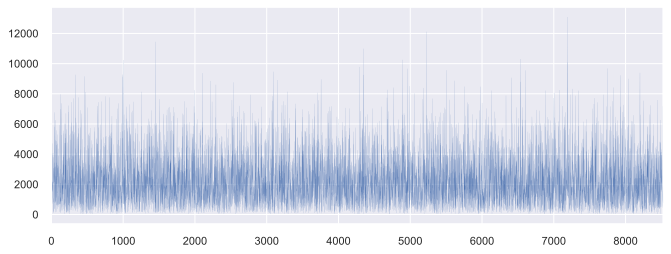

In [72]:
train_bundas['Item_Store_Sales'].plot(linewidth=0.1);


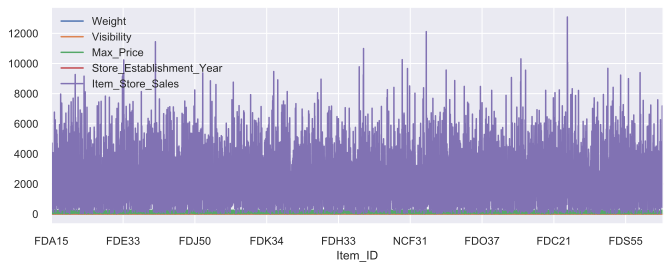

In [73]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('bundas_train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [74]:

from pandas import read_csv
from matplotlib import pyplot
series = read_csv('bundas_train.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
pyplot.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A260A97C8>,
      dtype=object)

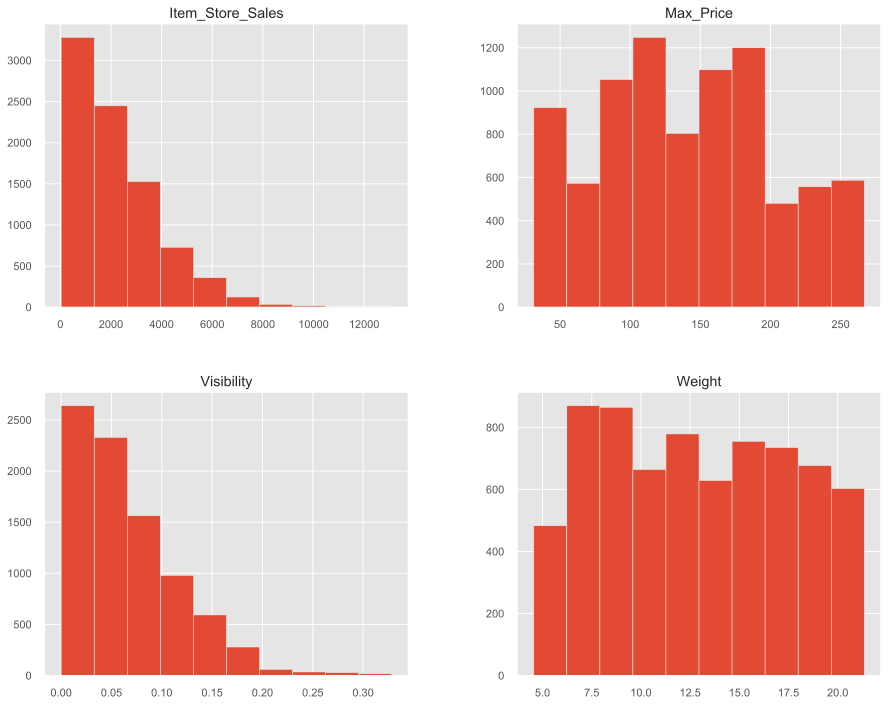

In [80]:
train_bundas.hist(figsize=(15,12))

###### Fat Content

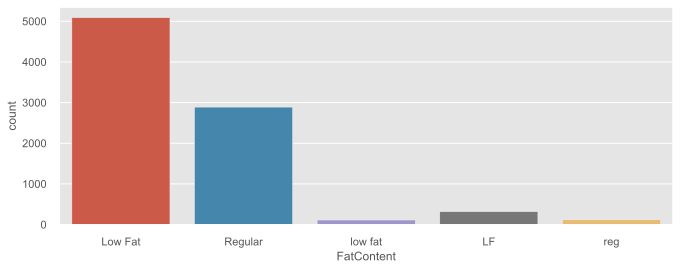

In [83]:
sns.countplot(train_bundas.FatContent)

###### Category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

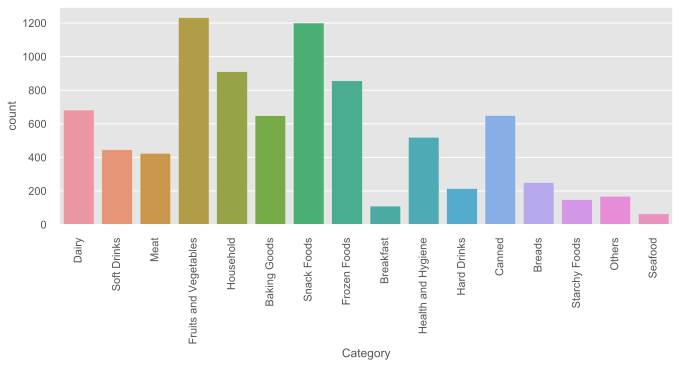

In [85]:
sns.countplot(train_bundas.Category)
plt.xticks(rotation=90)

###### Store size

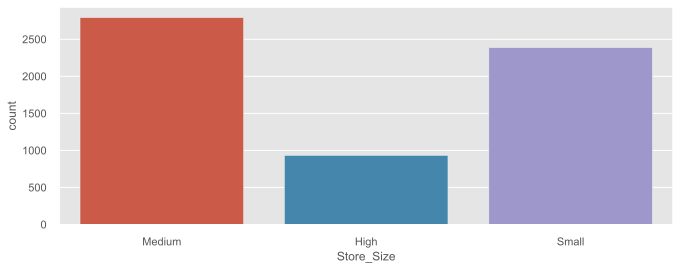

In [87]:
sns.countplot(train_bundas.Store_Size)


###### Store Location Type

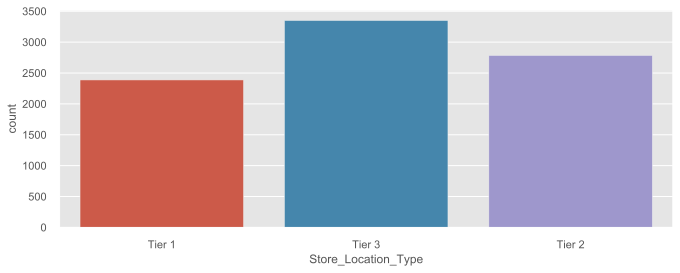

In [88]:
sns.countplot(train_bundas.Store_Location_Type)

###### Store Type

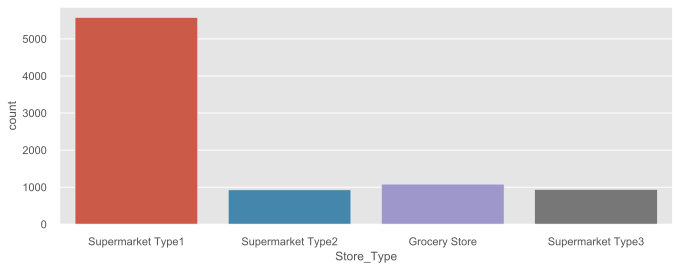

In [89]:
sns.countplot(train_bundas.Store_Type)

#### Weight and Item store Sales

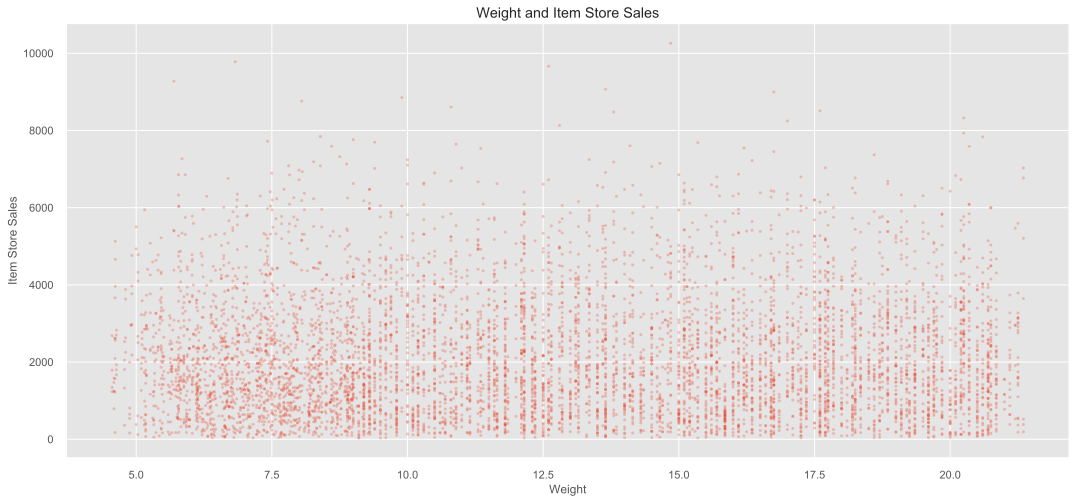

In [93]:
plt.figure(figsize=(18,8))
plt.xlabel("Weight")
plt.ylabel("Item Store Sales")
plt.title("Weight and Item Store Sales")
plt.plot(train_bundas.Weight, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

###### visibility and item store sales

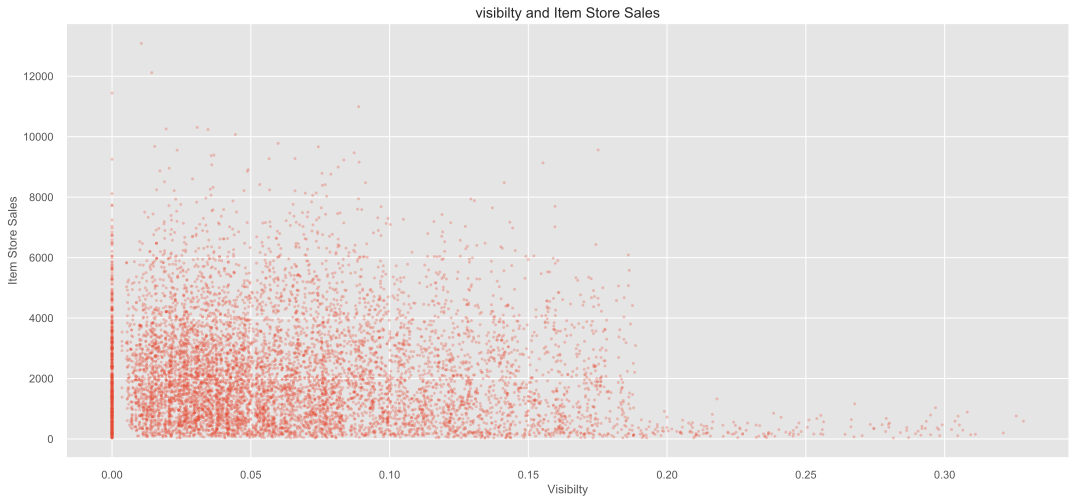

In [94]:
plt.figure(figsize=(18,8))
plt.xlabel("Visibilty")
plt.ylabel("Item Store Sales")
plt.title("visibilty and Item Store Sales")
plt.plot(train_bundas.Visibility, train_bundas["Item_Store_Sales"],'.', alpha = 0.3)

###### Category and item store sales

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

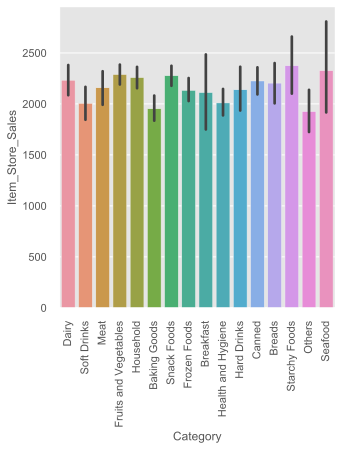

In [99]:
sns.catplot(x="Category", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Fat content and Item Store Sales

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

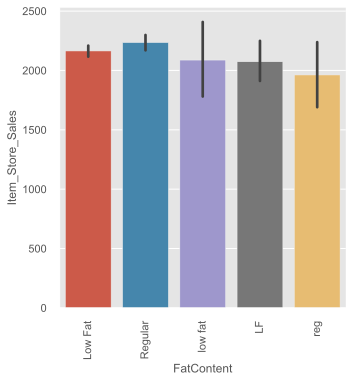

In [97]:
sns.catplot(x="FatContent", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store and Item store sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

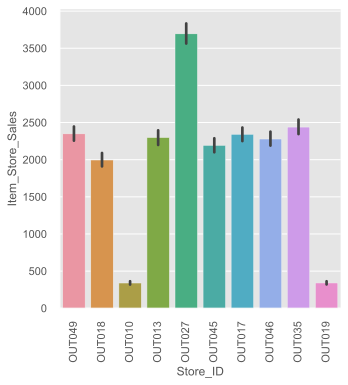

In [98]:
sns.catplot(x="Store_ID", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store size and item store sale

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

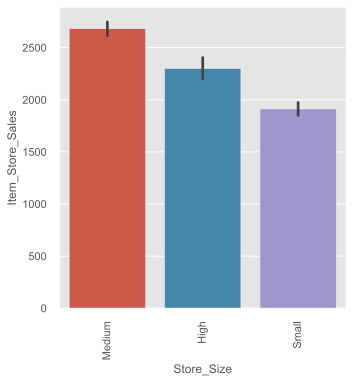

In [100]:
sns.catplot(x="Store_Size", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store Location Type and Item Store Sales

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

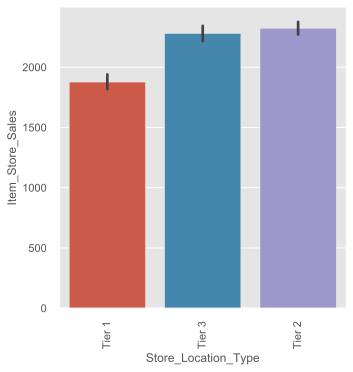

In [101]:
sns.catplot(x="Store_Location_Type", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

###### Store Type and item Store Sales

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

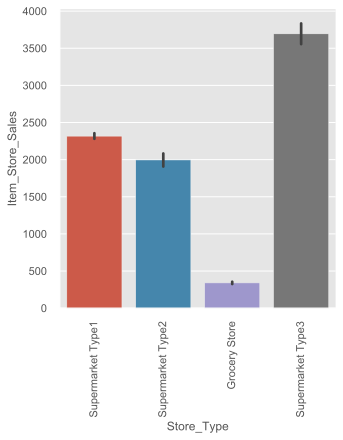

In [102]:
sns.catplot(x="Store_Type", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

##### Store Establishment Year and item store sales

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

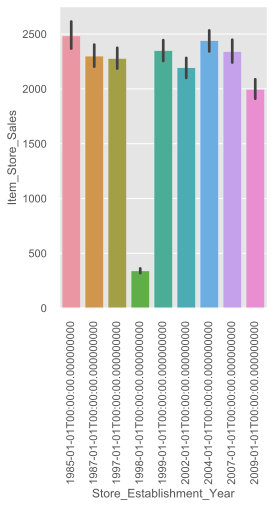

In [103]:
sns.catplot(x="Store_Establishment_Year", y="Item_Store_Sales", kind="bar", data=train_bundas);
plt.xticks(rotation=90)

## Feature engineering

##### imputer missing value with the means

In [107]:
from sklearn.preprocessing import Imputer

In [124]:
# replace missing values with the column mean
df_mean_imputed = train_bundas.fillna(train_bundas.mean())
#df_median_imputed = train_bundas.fillna(train_bundas.median())
df_mean_imputed.head(15)

Item_ID  Weight FatContent  Visibility               Category  Max_Price  \
0    FDA15    9.30    Low Fat        0.02                  Dairy     249.81   
1    DRC01    5.92    Regular        0.02            Soft Drinks      48.27   
2    FDN15   17.50    Low Fat        0.02                   Meat     141.62   
3    FDX07   19.20    Regular        0.00  Fruits and Vegetables     182.09   
4    NCD19    8.93    Low Fat        0.00              Household      53.86   
5    FDP36   10.39    Regular        0.00           Baking Goods      51.40   
6    FDO10   13.65    Regular        0.01            Snack Foods      57.66   
7    FDP10   12.86    Low Fat        0.13            Snack Foods     107.76   
8    FDH17   16.20    Regular        0.02           Frozen Foods      96.97   
9    FDU28   19.20    Regular        0.09           Frozen Foods     187.82   
10   FDY07   11.80    Low Fat        0.00  Fruits and Vegetables      45.54   
11   FDA03   18.50    Regular        0.05                  Dairy     144.11   
12   FDX32   15.10    Regular        0.10  Fruits and Vegetables     145.48   
13   FDS46   17.60    Regular        0.05            Snack Foods     119.68   
14   FDF32   16.35    Low Fat        0.07  Fruits and Vegetables     196.44   

   Store_ID Store_Establishment_Year Store_Size Store_Location_Type  \
0    OUT049               1999-01-01     Medium              Tier 1   
1    OUT018               2009-01-01     Medium              Tier 3   
2    OUT049               1999-01-01     Medium              Tier 1   
3    OUT010               1998-01-01        NaN              Tier 3   
4    OUT013               1987-01-01       High              Tier 3   
5    OUT018               2009-01-01     Medium              Tier 3   
6    OUT013               1987-01-01       High              Tier 3   
7    OUT027               1985-01-01     Medium              Tier 3   
8    OUT045               2002-01-01        NaN              Tier 2   
9    OUT017               2007-01-01        NaN              Tier 2   
10   OUT049               1999-01-01     Medium              Tier 1   
11   OUT046               1997-01-01      Small              Tier 1   
12   OUT049               1999-01-01     Medium              Tier 1   
13   OUT046               1997-01-01      Small              Tier 1   
14   OUT013               1987-01-01       High              Tier 3   

           Store_Type  Item_Store_Sales  
0   Supermarket Type1          3,735.14  
1   Supermarket Type2            443.42  
2   Supermarket Type1          2,097.27  
3       Grocery Store            732.38  
4   Supermarket Type1            994.71  
5   Supermarket Type2            556.61  
6   Supermarket Type1            343.55  
7   Supermarket Type3          4,022.76  
8   Supermarket Type1          1,076.60  
9   Supermarket Type1          4,710.53  
10  Supermarket Type1          1,516.03  
11  Supermarket Type1          2,187.15  
12  Supermarket Type1          1,589.26  
13  Supermarket Type1          2,145.21  
14  Supermarket Type1          1,977.43

In [125]:
# Checking Null values in test Set
df_mean_imputed.isnull().sum()

Item_ID                        0
Weight                         0
FatContent                     0
Visibility                     0
Category                       0
Max_Price                      0
Store_ID                       0
Store_Establishment_Year       0
Store_Size                  2410
Store_Location_Type            0
Store_Type                     0
Item_Store_Sales               0
dtype: int64

In [126]:
df_mean_imputed.dropna()

Item_ID  Weight FatContent  Visibility            Category  Max_Price  \
0      FDA15    9.30    Low Fat        0.02               Dairy     249.81   
1      DRC01    5.92    Regular        0.02         Soft Drinks      48.27   
2      FDN15   17.50    Low Fat        0.02                Meat     141.62   
4      NCD19    8.93    Low Fat        0.00           Household      53.86   
5      FDP36   10.39    Regular        0.00        Baking Goods      51.40   
...      ...     ...        ...         ...                 ...        ...   
8517   FDF53   20.75        reg        0.08        Frozen Foods     178.83   
8518   FDF22    6.87    Low Fat        0.06         Snack Foods     214.52   
8520   NCJ29   10.60    Low Fat        0.04  Health and Hygiene      85.12   
8521   FDN46    7.21    Regular        0.15         Snack Foods     103.13   
8522   DRG01   14.80    Low Fat        0.04         Soft Drinks      75.47   

     Store_ID Store_Establishment_Year Store_Size Store_Location_Type  \
0      OUT049               1999-01-01     Medium              Tier 1   
1      OUT018               2009-01-01     Medium              Tier 3   
2      OUT049               1999-01-01     Medium              Tier 1   
4      OUT013               1987-01-01       High              Tier 3   
5      OUT018               2009-01-01     Medium              Tier 3   
...       ...                      ...        ...                 ...   
8517   OUT046               1997-01-01      Small              Tier 1   
8518   OUT013               1987-01-01       High              Tier 3   
8520   OUT035               2004-01-01      Small              Tier 2   
8521   OUT018               2009-01-01     Medium              Tier 3   
8522   OUT046               1997-01-01      Small              Tier 1   

             Store_Type  Item_Store_Sales  
0     Supermarket Type1          3,735.14  
1     Supermarket Type2            443.42  
2     Supermarket Type1          2,097.27  
4     Supermarket Type1            994.71  
5     Supermarket Type2            556.61  
...                 ...               ...  
8517  Supermarket Type1          3,608.64  
8518  Supermarket Type1          2,778.38  
8520  Supermarket Type1          1,193.11  
8521  Supermarket Type2          1,845.60  
8522  Supermarket Type1            765.67  

[6113 rows x 12 columns]

In [137]:

modDf = df_mean_imputed.dropna(how='any', subset=['Store_Size'])

In [138]:
modDf.head(20)

Item_ID  Weight FatContent  Visibility               Category  Max_Price  \
0    FDA15    9.30    Low Fat        0.02                  Dairy     249.81   
1    DRC01    5.92    Regular        0.02            Soft Drinks      48.27   
2    FDN15   17.50    Low Fat        0.02                   Meat     141.62   
4    NCD19    8.93    Low Fat        0.00              Household      53.86   
5    FDP36   10.39    Regular        0.00           Baking Goods      51.40   
6    FDO10   13.65    Regular        0.01            Snack Foods      57.66   
7    FDP10   12.86    Low Fat        0.13            Snack Foods     107.76   
10   FDY07   11.80    Low Fat        0.00  Fruits and Vegetables      45.54   
11   FDA03   18.50    Regular        0.05                  Dairy     144.11   
12   FDX32   15.10    Regular        0.10  Fruits and Vegetables     145.48   
13   FDS46   17.60    Regular        0.05            Snack Foods     119.68   
14   FDF32   16.35    Low Fat        0.07  Fruits and Vegetables     196.44   
15   FDP49    9.00    Regular        0.07              Breakfast      56.36   
16   NCB42   11.80    Low Fat        0.01     Health and Hygiene     115.35   
17   FDP49    9.00    Regular        0.07              Breakfast      54.36   
18   DRI11   12.86    Low Fat        0.03            Hard Drinks     113.28   
19   FDU02   13.35    Low Fat        0.10                  Dairy     230.54   
20   FDN22   18.85    Regular        0.14            Snack Foods     250.87   
21   FDW12   12.86    Regular        0.04           Baking Goods     144.54   
22   NCB30   14.60    Low Fat        0.03              Household     196.51   

   Store_ID Store_Establishment_Year Store_Size Store_Location_Type  \
0    OUT049               1999-01-01     Medium              Tier 1   
1    OUT018               2009-01-01     Medium              Tier 3   
2    OUT049               1999-01-01     Medium              Tier 1   
4    OUT013               1987-01-01       High              Tier 3   
5    OUT018               2009-01-01     Medium              Tier 3   
6    OUT013               1987-01-01       High              Tier 3   
7    OUT027               1985-01-01     Medium              Tier 3   
10   OUT049               1999-01-01     Medium              Tier 1   
11   OUT046               1997-01-01      Small              Tier 1   
12   OUT049               1999-01-01     Medium              Tier 1   
13   OUT046               1997-01-01      Small              Tier 1   
14   OUT013               1987-01-01       High              Tier 3   
15   OUT046               1997-01-01      Small              Tier 1   
16   OUT018               2009-01-01     Medium              Tier 3   
17   OUT049               1999-01-01     Medium              Tier 1   
18   OUT027               1985-01-01     Medium              Tier 3   
19   OUT035               2004-01-01      Small              Tier 2   
20   OUT013               1987-01-01       High              Tier 3   
21   OUT027               1985-01-01     Medium              Tier 3   
22   OUT035               2004-01-01      Small              Tier 2   

           Store_Type  Item_Store_Sales  
0   Supermarket Type1          3,735.14  
1   Supermarket Type2            443.42  
2   Supermarket Type1          2,097.27  
4   Supermarket Type1            994.71  
5   Supermarket Type2            556.61  
6   Supermarket Type1            343.55  
7   Supermarket Type3          4,022.76  
10  Supermarket Type1          1,516.03  
11  Supermarket Type1          2,187.15  
12  Supermarket Type1          1,589.26  
13  Supermarket Type1          2,145.21  
14  Supermarket Type1          1,977.43  
15  Supermarket Type1          1,547.32  
16  Supermarket Type2          1,621.89  
17  Supermarket Type1            718.40  
18  Supermarket Type3          2,303.67  
19  Supermarket Type1          2,748.42  
20  Supermarket Type1          3,775.09  
21  Supermarket Type3          4,064.04  
22  Superma

In [139]:
modDf.isnull().sum()

Item_ID                     0
Weight                      0
FatContent                  0
Visibility                  0
Category                    0
Max_Price                   0
Store_ID                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_Type         0
Store_Type                  0
Item_Store_Sales            0
dtype: int64

In [141]:
modDf.dtypes

Item_ID                             object
Weight                             float64
FatContent                          object
Visibility                         float64
Category                            object
Max_Price                          float64
Store_ID                            object
Store_Establishment_Year    datetime64[ns]
Store_Size                          object
Store_Location_Type                 object
Store_Type                          object
Item_Store_Sales                   float64
dtype: object

##### Check correlation between features

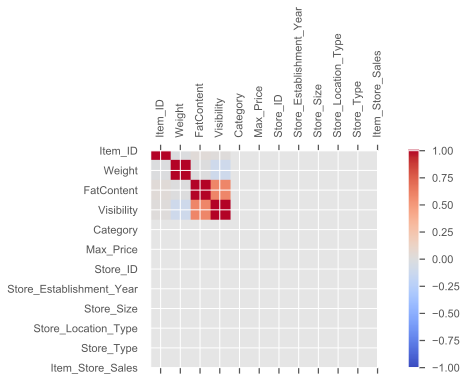

In [144]:
corr = modDf.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(modDf.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(modDf.columns)
ax.set_yticklabels(modDf.columns)
plt.show()

In [145]:
corr = modDf.corr()

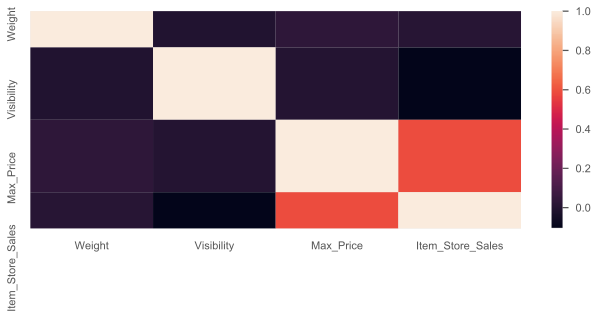

In [146]:
sns.heatmap(corr)


###### Identify Highly Correlated Features

In [147]:
# Create correlation matrix
corr_matrix = modDf.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [148]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [150]:
# Drop features 
modDf.drop(modDf[to_drop], axis=1)

Item_ID  Weight FatContent  Visibility            Category  Max_Price  \
0      FDA15    9.30    Low Fat        0.02               Dairy     249.81   
1      DRC01    5.92    Regular        0.02         Soft Drinks      48.27   
2      FDN15   17.50    Low Fat        0.02                Meat     141.62   
4      NCD19    8.93    Low Fat        0.00           Household      53.86   
5      FDP36   10.39    Regular        0.00        Baking Goods      51.40   
...      ...     ...        ...         ...                 ...        ...   
8517   FDF53   20.75        reg        0.08        Frozen Foods     178.83   
8518   FDF22    6.87    Low Fat        0.06         Snack Foods     214.52   
8520   NCJ29   10.60    Low Fat        0.04  Health and Hygiene      85.12   
8521   FDN46    7.21    Regular        0.15         Snack Foods     103.13   
8522   DRG01   14.80    Low Fat        0.04         Soft Drinks      75.47   

     Store_ID Store_Establishment_Year Store_Size Store_Location_Type  \
0      OUT049               1999-01-01     Medium              Tier 1   
1      OUT018               2009-01-01     Medium              Tier 3   
2      OUT049               1999-01-01     Medium              Tier 1   
4      OUT013               1987-01-01       High              Tier 3   
5      OUT018               2009-01-01     Medium              Tier 3   
...       ...                      ...        ...                 ...   
8517   OUT046               1997-01-01      Small              Tier 1   
8518   OUT013               1987-01-01       High              Tier 3   
8520   OUT035               2004-01-01      Small              Tier 2   
8521   OUT018               2009-01-01     Medium              Tier 3   
8522   OUT046               1997-01-01      Small              Tier 1   

             Store_Type  Item_Store_Sales  
0     Supermarket Type1          3,735.14  
1     Supermarket Type2            443.42  
2     Supermarket Type1          2,097.27  
4     Supermarket Type1            994.71  
5     Supermarket Type2            556.61  
...                 ...               ...  
8517  Supermarket Type1          3,608.64  
8518  Supermarket Type1          2,778.38  
8520  Supermarket Type1          1,193.11  
8521  Supermarket Type2          1,845.60  
8522  Supermarket Type1            765.67  

[6113 rows x 12 columns]

##### encode categorical variables

Since scikit-learn only accepts numerical variables, we need to convert all categories of nominal variables into numeric types

In [153]:
#Import library:
from sklearn.preprocessing import LabelEncoder
